In [2]:
import pandas as pd
from scipy.spatial.distance import euclidean
import math
import numpy as np

merged_data = pd.read_csv("windwave_data2b.csv")

# for col in merged_data.columns:
#   print(col)

Using the scipy.spatial.distance module in Python to calculate the Euclidean distance

In [17]:
# Calculate the Euclidean distance between the merged coordinates and the original coordinates
merged_data['euclidean_distance'] = merged_data.apply(lambda row: euclidean((row['lat'], row['lon']), (row['lat.1'], row['lon.1'])), axis=1)

# Now 'merged_df' will have a new column 'distance' containing the Euclidean distances

print(merged_data.head())



       lat      lon   V10PCT_0  V10PCT_22  V10PCT_45  V10PCT_67  V10PCT_90  \
0  56.3125  13.9375   5.740000   6.593333  10.159000   8.482308   8.122500   
1  54.5625  15.4375   9.560000  11.627647  11.312432  11.404286  10.509310   
2  54.6875  15.5625   9.055000  10.330667  11.656857  10.435000  10.643043   
3  54.8125  15.6875  11.300000   9.430714  10.500238   9.960476  10.598667   
4  54.9375  15.8125   9.115556  10.095714  10.445000  11.572222  10.423103   

   V10PCT_112  V10PCT_135  V10PCT_157  ...  Wav_PPCT270  Wav_PPCT292  \
0    6.058182    7.372857    6.646667  ...     0.061478     0.068543   
1   10.080000   10.512500    7.903333  ...     0.083864     0.101839   
2   10.403750   11.817500    8.545000  ...     0.105045     0.083912   
3   10.263636   11.571250   10.460000  ...     0.105045     0.083912   
4   10.522727   11.608000   11.580000  ...     0.089071     0.125714   

   Wav_PPCT315  Wav_PPCT337  euclidean_distance  haversine_distance  \
0     0.056801     0.054334

In [18]:
# Calculate mean, median, and standard deviation of Euclidean distances
mean_distance = np.mean(merged_data['euclidean_distance'])
median_distance = np.median(merged_data['euclidean_distance'])
std_distance = np.std(merged_data['euclidean_distance'])

print("Mean Distance:", mean_distance)
print("Median Distance:", median_distance)
print("Standard Deviation of Distance:", std_distance)

Mean Distance: 3.093634119281569
Median Distance: 2.9223915180154543
Standard Deviation of Distance: 1.7182407449116874


Importing the haversine function from the haversine library to calculate the Haversine distance

In [13]:
from haversine import haversine, Unit

# Assuming merged_data is your dataframe containing the columns lat, lon, lat.1, and lon.1

# Calculate Haversine distances between (lat, lon) and (lat.1, lon.1)
merged_data['haversine_distance'] = merged_data.apply(lambda row: haversine((row['lat'], row['lon']), (row['lat.1'], row['lon.1']), unit=Unit.METERS), axis=1)

# Calculate mean, median, and standard deviation of Haversine distances
mean_distance1 = np.mean(merged_data['haversine_distance'])
median_distance1 = np.median(merged_data['haversine_distance'])
std_distance1 = np.std(merged_data['haversine_distance'])

print("Mean Distance:", mean_distance1, "meters")
print("Median Distance:", median_distance1, "meters")
print("Standard Deviation of Distance:", std_distance1, "meters")


Mean Distance: 225012.5534961849 meters
Median Distance: 226785.63918367203 meters
Standard Deviation of Distance: 108768.37810097936 meters


Calculating the % difference between the original coordinates (lat.1 and lon.1) and the nearest neighbor coordinates (lat and lon)

In [3]:
merged_data['lat_difference'] = abs(merged_data['lat'])-(merged_data['lat.1'])
merged_data['lat_%_difference'] = 100*merged_data['lat_difference']/merged_data['lat.1']
merged_data['lon_difference'] = abs(merged_data['lon'])-(merged_data['lon.1'])
merged_data['lon_%_difference'] = 100*merged_data['lon_difference']/merged_data['lon.1']
# print(merged_data.head())
# print(merged_data['lat_%_difference'])

# Calculate mean, median, and standard deviation of % difference
mean_lat_difference = np.mean(merged_data['lat_%_difference'])
mean_lon_difference = np.mean(merged_data['lon_%_difference'])
median_lat_difference = np.median(merged_data['lat_%_difference'])
median_lon_difference = np.median(merged_data['lon_%_difference'])
std_lat_difference = np.std(merged_data['lat_%_difference'])
std_lon_difference = np.std(merged_data['lon_%_difference'])
                                             
print("Mean lat % difference:", mean_lat_difference)
print("Median lat % difference:", median_lat_difference)
print("Standard Deviation of lat % difference:", std_lat_difference)
                                              
print("Mean lon % difference:", mean_lon_difference)
print("Median lon % difference:", median_lon_difference)
print("Standard Deviation of lon % difference:", std_lon_difference)


Mean lat % difference: 0.3682739724219982
Median lat % difference: 0.2835349488375591
Standard Deviation of lat % difference: 2.0911077621789493
Mean lon % difference: 11.340610440228504
Median lon % difference: 10.8579177776937
Standard Deviation of lon % difference: 18.83394995377788


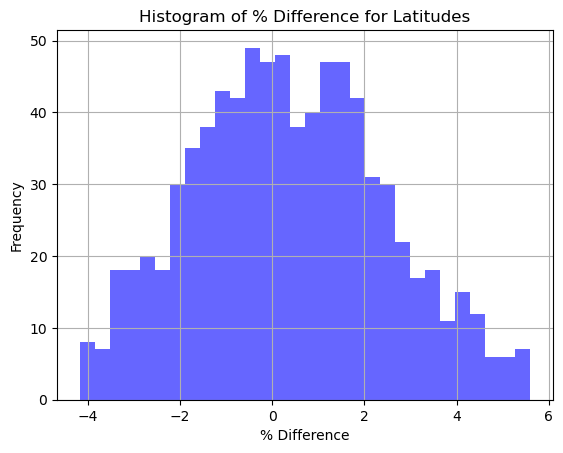

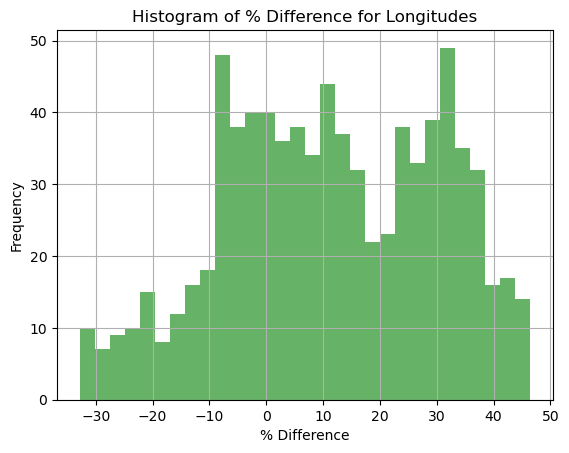

In [15]:
import matplotlib.pyplot as plt

# Plot a histogram of % difference for latitudes
plt.hist(merged_data['lat_%_difference'], bins=30, color='blue', alpha=0.6)
plt.xlabel('% Difference')
plt.ylabel('Frequency')
plt.title('Histogram of % Difference for Latitudes')
plt.grid(True)
plt.show()

# Plot a histogram of % difference for longitudes
plt.hist(merged_data['lon_%_difference'], bins=30, color='green', alpha=0.6)
plt.xlabel('% Difference')
plt.ylabel('Frequency')
plt.title('Histogram of % Difference for Longitudes')
plt.grid(True)
plt.show()


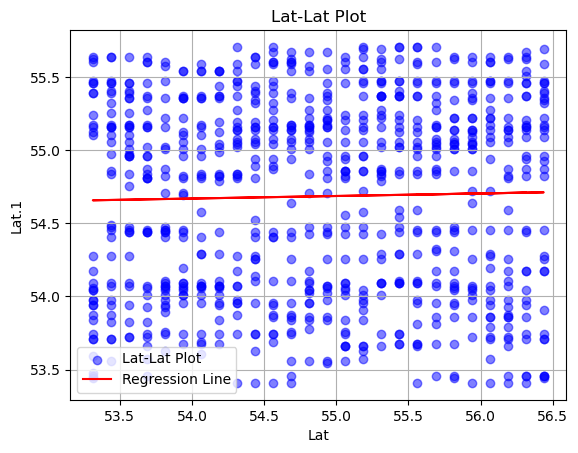

Lat.1 = 0.02 * Lat + 53.73


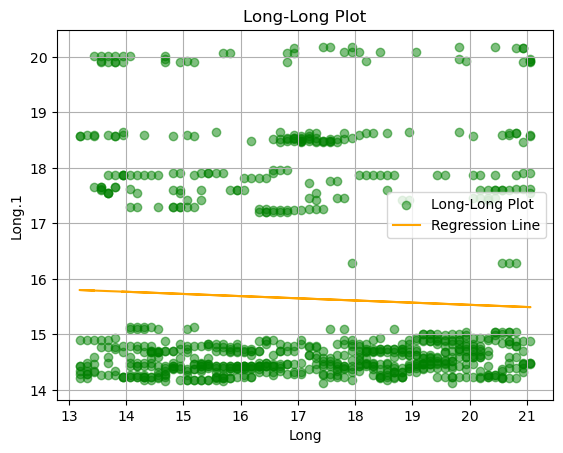

Lon.1 = -0.04 * Lon + 16.32


In [6]:
from scipy.stats import linregress

# Create Lat-Lat plot and regression
plt.scatter(merged_data['lat'], merged_data['lat.1'], alpha=0.5, color='blue', label='Lat-Lat Plot')
plt.xlabel('Lat')
plt.ylabel('Lat.1')
plt.title('Lat-Lat Plot')
plt.grid(True)

# Perform linear regression
slope_lat, intercept_lat, r_value_lat, p_value_lat, std_err_lat = linregress(merged_data['lat'], merged_data['lat.1'])
plt.plot(merged_data['lat'], slope_lat * merged_data['lat'] + intercept_lat, color='red', label='Regression Line')

plt.legend()
plt.show()

# Print the equation of the regression line
print(f'Lat.1 = {slope_lat:.2f} * Lat + {intercept_lat:.2f}')

# Create Long-Long plot and regression
plt.scatter(merged_data['lon'], merged_data['lon.1'], alpha=0.5, color='green', label='Long-Long Plot')
plt.xlabel('Long')
plt.ylabel('Long.1')
plt.title('Long-Long Plot')
plt.grid(True)

# Perform linear regression
slope_lon, intercept_lon, r_value_lon, p_value_lon, std_err_lon = linregress(merged_data['lon'], merged_data['lon.1'])
plt.plot(merged_data['lon'], slope_lon * merged_data['lon'] + intercept_lon, color='orange', label='Regression Line')

plt.legend()
plt.show()

# Print the equation of the regression line
print(f'Lon.1 = {slope_lon:.2f} * Lon + {intercept_lon:.2f}')
